#### Laboratorio #3 – Pipeline - Ingeniería de Características

#### MARIA FERNANDA MORALES ALVAREZ CARNÉ 220007685

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import missingno as msno

In [26]:
df = pd.read_csv('train.csv')
df.head()

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN


In [27]:
df.shape

(14447, 11)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14447 entries, 0 to 14446
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14447 non-null  int64  
 1   longitude           14447 non-null  float64
 2   latitude            14447 non-null  float64
 3   housing_median_age  14447 non-null  int64  
 4   total_rooms         14447 non-null  int64  
 5   total_bedrooms      14310 non-null  float64
 6   population          14447 non-null  int64  
 7   households          14447 non-null  int64  
 8   median_income       14447 non-null  float64
 9   median_house_value  14447 non-null  float64
 10  ocean_proximity     14447 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.2+ MB


#### 1. Determine que columnas poseen faltantes (NA o Nulos)

In [29]:
df.isnull().sum()

id                      0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### 2. Determine la proporción de faltantes para cada columna con faltantes, muestre una gráfica de barras.

<AxesSubplot:>

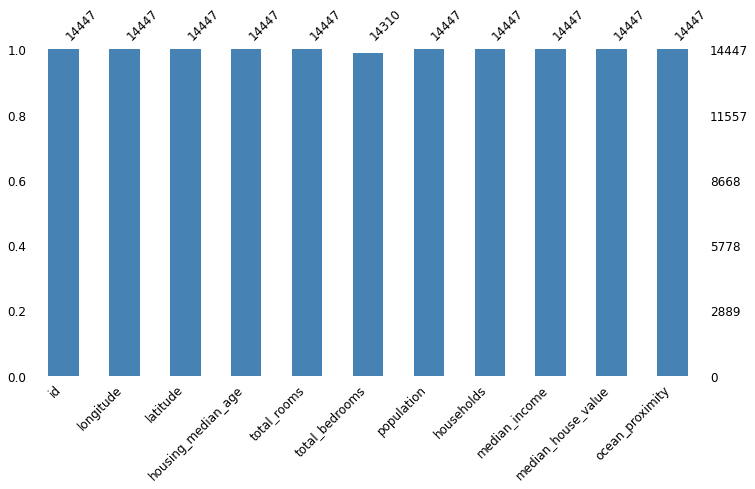

In [30]:
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

## Se puede observar que la columna con faltantes es TOTAL_BEDROOMS

#### 3. Si la variable es numérica realice un análisis de cual sería el mejor método para realizar la imputación de datos, debe mostrar un bloque de código donde se muestre cada imputación y su análisis. Recuerde que puede ser: a. Eliminar los faltantes, b. Imputación de media o mediana, c. Valores arbitrarios (extremo derecho y extremo izquierdo), d. Generación de números aleatorios en base a la distribución (no visto en clase).

In [31]:
media = df['total_bedrooms'].mean()
mediana = df['total_bedrooms'].median()

print(f"Media:{media}")
print(f"Median:{mediana}")

Media:537.7787561146051
Median:433.0


In [32]:
df['total_bedrooms_Mean'] = np.round(df['total_bedrooms'].fillna(media))
df['total_bedrooms_Median'] = np.round(df['total_bedrooms'].fillna(mediana))

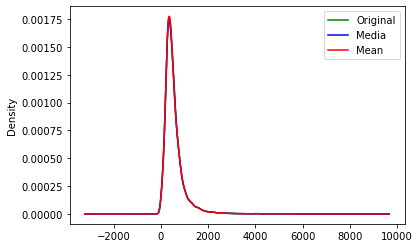

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['total_bedrooms'].plot.density(color='green',label='Original')
df['total_bedrooms_Mean'].plot.density(color='blue',label='Media')
df['total_bedrooms_Median'].plot.density(color='red',label='Mean')
ax.legend()

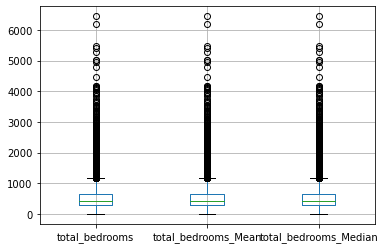

In [34]:
df[['total_bedrooms', 'total_bedrooms_Mean', 'total_bedrooms_Median']].boxplot()
plt.show()

#### 4. Si la variable es categórica, realice una imputación que considere necesaria.
Se puede observar que la variable con faltantes es numérica y no categórica

#### 5. Realice la codificación de variables categóricas, determine cual es le mejor enfoque para cada caso, recuerde que puede realizar los siguientes enfoques: a. One Hote Encodign. b. Codificación por Frecuencia. C. codificación por Densidad.

In [35]:
df.dtypes

id                         int64
longitude                float64
latitude                 float64
housing_median_age         int64
total_rooms                int64
total_bedrooms           float64
population                 int64
households                 int64
median_income            float64
median_house_value       float64
ocean_proximity           object
total_bedrooms_Mean      float64
total_bedrooms_Median    float64
dtype: object

<BarContainer object of 5 artists>

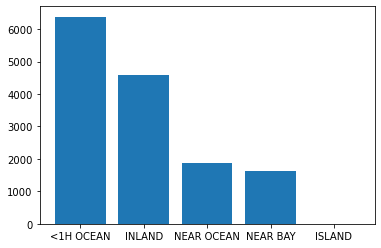

In [44]:
conteo = df['ocean_proximity'].value_counts()
plt.bar(conteo.index,conteo.values)

#### 6. Para todas las variables resultantes realice Feature Scaling según lo considere más pertinente.

In [49]:
df = pd.get_dummies(df, columns = ['ocean_proximity'])

In [51]:
scaler = StandardScaler()
DFscaler = scaler.fit_transform(df)
DFscaler = pd.DataFrame(DFscaler, columns=df.columns)


In [53]:
round(DFscaler.describe(),2)

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_bedrooms_Mean,total_bedrooms_Median,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
count,14447.00,14447.00,14447.00,14447.00,14447.00,14310.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00,14447.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.72,-2.36,-1.45,-2.21,-1.19,-1.27,-1.26,-1.29,-1.78,-1.66,-1.27,-1.27,-0.89,-0.68,-0.01,-0.36,-0.39
25%,-0.86,-1.11,-0.80,-0.86,-0.54,-0.57,-0.57,-0.57,-0.69,-0.76,-0.57,-0.57,-0.89,-0.68,-0.01,-0.36,-0.39
50%,-0.01,0.54,-0.65,0.01,-0.23,-0.25,-0.23,-0.24,-0.17,-0.24,-0.24,-0.25,-0.89,-0.68,-0.01,-0.36,-0.39
75%,0.87,0.78,0.97,0.65,0.23,0.26,0.26,0.27,0.45,0.50,0.25,0.25,1.12,1.47,-0.01,-0.36,-0.39
max,1.74,2.63,2.95,1.84,16.56,13.93,24.15,14.45,5.88,2.54,14.00,14.00,1.12,1.47,84.99,2.81,2.60
